# Data Understanding and Data Preparation Exercise
### Courtesy of Intel Advanced Analytics



In this exercise you will explore data that is related with direct marketing campaigns of a Portuguese banking institution. 
The marketing campaigns were based on phone calls. Often, more than one contact to the same client was required, 
in order to access if the product (bank term deposit) would be (or not) subscribed. 

Data source:
 [Moro et al., 2011] S. Moro, R. Laureano and P. Cortez. Using Data Mining for Bank Direct Marketing: An Application of the CRISP-DM Methodology. 
 
Good luck!

# Q1


## Familiarizing yourself with the data

1) Download the 'bank-full_2016.csv' database to a local directory, and load it into a DataFrame object: http://slavanov.com/teaching/ds1617b/bank-full_2016.csv

In [4]:

import pandas as pd
df = pd.read_csv(r"C:\Users\gefenk\Documents\Data science\DataScience\bank-full_2016.csv")


2) Explore your data a bit:
- What are the dimensions of the table?
- What are the different attributes in it?
- Return a frequency table of the "outcome" category in the table - i.e return all the possible values in that category, and how many times each value is present in the table.
- Display the first 5 rows of the table.

In [8]:
print ("the dinemsion of the table {}".format(df.shape))

print ("the different attirbutes in it: {}".format(df.columns.values))

print (pd.crosstab(index=df['outcome'],  columns="count"))

print (df.head(5))

the dinemsion of the table (45211, 17)
the different attirbutes in it: ['age' 'job' 'marital' 'education' 'default_credit' 'balance'
 'housing_loan' 'personal_loan' 'contact' 'day' 'month' 'duration'
 'campaign' 'days_from_last_contact' 'previous_campaign_contacts'
 'previous_campaign_outcome' 'outcome']
col_0    count
outcome       
no       39922
yes       5289
   age           job  marital  education default_credit  balance housing_loan  \
0   58    management  married   tertiary             no     2143          yes   
1   44    technician   single  secondary             no       29          yes   
2   33  entrepreneur  married  secondary             no        2          yes   
3   47   blue-collar  married    unknown             no     1506          yes   
4   33       unknown   single    unknown             no        1           no   

  personal_loan  contact  day month  duration  campaign  \
0            no  unknown    5   may       261         1   
1            no  unknown    5

3) What is the data type of each attribute in the table?

In [11]:
for index,val in enumerate(df.iloc[0,:]):
    print ("the attribute : {} the type: {}".format( df.columns.values[index], type(val)))

the attribute : age the type: <class 'numpy.int64'>
the attribute : job the type: <class 'str'>
the attribute : marital the type: <class 'str'>
the attribute : education the type: <class 'str'>
the attribute : default_credit the type: <class 'str'>
the attribute : balance the type: <class 'numpy.int64'>
the attribute : housing_loan the type: <class 'str'>
the attribute : personal_loan the type: <class 'str'>
the attribute : contact the type: <class 'str'>
the attribute : day the type: <class 'numpy.int64'>
the attribute : month the type: <class 'str'>
the attribute : duration the type: <class 'numpy.int64'>
the attribute : campaign the type: <class 'numpy.int64'>
the attribute : days_from_last_contact the type: <class 'numpy.float64'>
the attribute : previous_campaign_contacts the type: <class 'numpy.int64'>
the attribute : previous_campaign_outcome the type: <class 'str'>
the attribute : outcome the type: <class 'str'>


## Manipulating DataFrames

1) Add to the table a Boolean attribute called 'isContactKnown'. It should say for each element if the 'contact' category is 'unknown' or is it 'cellular'/'telephone'

In [13]:
array = df['contact'].values !='unknown'
df.loc[:,'isContactKnown'] = pd.Series(array, index=df.index)
df


,age,job,marital,education,default_credit,balance,housing_loan,personal_loan,contact,day,month,duration,campaign,days_from_last_contact,previous_campaign_contacts,previous_campaign_outcome,outcome,isContactKnown
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,NaN,0,unknown,no,False
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,NaN,0,unknown,no,False
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,NaN,0,unknown,no,False
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,NaN,0,unknown,no,False
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,NaN,0,unknown,no,False
5,35,management,married,tertiary,no,231,yes,no,unknown,5,may,139,1,NaN,0,unknown,no,False
6,28,management,single,tertiary,no,447,yes,yes,unknown,5,may,217,1,NaN,0,unknown,no,False
7,42,entrepreneur,divorced,tertiary,yes,2,yes,no,unknown,5,may,380,1,NaN,0,unknown,no,False
8,58,retired,married,primary,no,121,yes,no,unknown,5,may,50,1,NaN,0,unknown,no,False
9,43,technician,single,secondary,no,593,yes,no,unknown,5,may,55,1,NaN,0,unknown,no,False


2) Change the type of the 'campaign' attribute to Categorical data.

In [14]:
df["campaign"] = df["campaign"].astype('category')

## Data Distribution

1) What is the range of values for each attribute in the table? what are the mean, std, median values for each category? Hint: You can do all this with one command!

In [15]:
df.describe()

,age,balance,day,duration,days_from_last_contact,previous_campaign_contacts
count,45211.000000,45211.000000,45211.000000,45211.000000,8257.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,224.577692,0.580323
std,10.618762,3044.765829,8.322476,257.527812,115.344035,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,133.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,194.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,327.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,871.000000,275.000000


2) Plot a histogram of the 'balance' attribute and a boxplot of the 'age' attribute.

AxesSubplot(0.125,0.125;0.775x0.755)


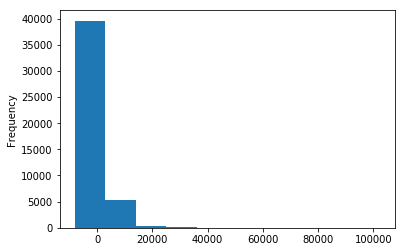

In [18]:
print (df["balance"].plot.hist())
print(df.boxplot(column=["age"]))

3) Plot separately the distributions of balance values for people with negative outcome and positive outcomes. Are they different? If so, how?

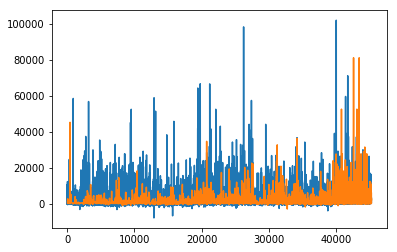

In [21]:
balance_neg_outcome = df[df["outcome"] == "no"]["balance"]
balance_pos_outcome = df[df["outcome"] == "yes"]["balance"]
import matplotlib.pyplot as plt
balance_neg_outcome.plot()
balance_pos_outcome.plot()

# Q2

## Missing Values

1) Which of the attributes have missing values? How many?

In [22]:
df.isna().sum()

age                               0
job                               0
marital                           0
education                         0
default_credit                    0
balance                           0
housing_loan                      0
personal_loan                     0
contact                           0
day                               0
month                             0
duration                          0
campaign                          0
days_from_last_contact        36954
previous_campaign_contacts        0
previous_campaign_outcome         0
outcome                           0
isContactKnown                    0
dtype: int64

2) Create another dataframe, which doesn't include any people with 'contact' which is 'cellular' or 'telephone'

In [28]:
df2 = df[(df["contact"] != "cellular") & (df["contact"] != "telephone")]
df2

,age,job,marital,education,default_credit,balance,housing_loan,personal_loan,contact,day,month,duration,campaign,days_from_last_contact,previous_campaign_contacts,previous_campaign_outcome,outcome,isContactKnown
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,NaN,0,unknown,no,False
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,NaN,0,unknown,no,False
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,NaN,0,unknown,no,False
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,NaN,0,unknown,no,False
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,NaN,0,unknown,no,False
5,35,management,married,tertiary,no,231,yes,no,unknown,5,may,139,1,NaN,0,unknown,no,False
6,28,management,single,tertiary,no,447,yes,yes,unknown,5,may,217,1,NaN,0,unknown,no,False
7,42,entrepreneur,divorced,tertiary,yes,2,yes,no,unknown,5,may,380,1,NaN,0,unknown,no,False
8,58,retired,married,primary,no,121,yes,no,unknown,5,may,50,1,NaN,0,unknown,no,False
9,43,technician,single,secondary,no,593,yes,no,unknown,5,may,55,1,NaN,0,unknown,no,False


3) Look at the missing values in the 'days_from_last_contact' attribute. What do you think these missing values might represent? Can you find support in the table for your assumption? Hint: The attribute names have a meaning.

In [30]:
df2["days_from_last_contact"].isna().sum()

12950

the missing cells represnet that never been contact to this specific person - for 1/3 from the missing cells people the tabe dont even know if its celular or telephone

## Discretization

In class, you've seen three methods of data discretization, and we will focus on two of them - Equal-width (distance) and Equal-depth (frequency).

1) Discretize the balance attribute to 7 intervals using equal-width discretization, and plot the frequency table for them.

In [32]:
width= pd.cut(df2["balance"], 7)
pd.crosstab(index=width,  columns="count")   


col_0,count
balance,
"(-3433.916, 5473.143]",12433
"(5473.143, 14318.286]",501
"(14318.286, 23163.429]",61
"(23163.429, 32008.571]",17
"(32008.571, 40853.714]",3
"(40853.714, 49698.857]",2
"(49698.857, 58544.0]",3


2) Discretize the age attribute into 6 intervals using equal-depth discretization, and plot the frequency table for them.

In [31]:
depth = pd.qcut(df2["age"], 6)
pd.crosstab(index=depth,  columns="count") 

col_0,count
age,
"(19.999, 31.0]",2464
"(31.0, 35.0]",1967
"(35.0, 39.0]",2136
"(39.0, 45.0]",2459
"(45.0, 51.0]",1853
"(51.0, 61.0]",2141


3) Propose a way to further discretize the Month column.

# Q3

## Correlation

1) Calculate the pearson and spearman correlation between age and balance.

2) Calculate the full pearson correlation matrix for all the numeric columns in the data.

## Mutual Information

Calcalate the entropy of each of the attributes in the data. Which has the biggest entropy?

Which attribute has the highest Mutual Information with the 'outcome' attribute?

# Q4

## Outliers

Does the campaign column in the table have any outliers? Support your claim with a relevant plot.

## Normalization

Think of an appropriate normalization method and normalize the days_from_last_contact column in the table. Why did you choose this method?